In [1]:

%matplotlib inline

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score  #Deciding Performance Measure
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import os
import seaborn as sns
import pymongo as mongo
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport

c:\Users\nakhu\anaconda3\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# connect to the database 
client = mongo.MongoClient("mongodb://localhost:27017")

# Select the database and collection
# database
db = client["crm"]

# collection
crm_activity = db["crm_activity"].find()
crm_activity_type = db["crm_activity_type"].find()
crm_customer = db["crm_customer"].find()
crm_deal = db["crm_deal"].find()
crm_organization = db["crm_organization"].find()
crm_pipeline = db["crm_pipeline"].find()
crm_user = db["crm_user"].find()

# convert to dataframe
crm_activity = pd.DataFrame(crm_activity)
crm_activity_type = pd.DataFrame(crm_activity_type)
crm_customer = pd.DataFrame(crm_customer)
crm_deal = pd.DataFrame(crm_deal)
crm_organization =pd.DataFrame(crm_organization)
crm_pipeline = pd.DataFrame(crm_pipeline)
crm_user = pd.DataFrame(crm_user)

In [3]:
crm_activity.head(5)

,_id,id,crmId,crmUserId,crmDealId,crmLeadId,crmType,crmAddTime,crmUpdateTime,crmDueDate,crmSubject,crmDone,isDeleted,createDate,companyId,crmDueTime,crmDuration
0,64902df27cc8b1037a57c92d,1,24900,3581210.0,2435.0,None,task,2018-04-19 15:46:32,2018-07-17 15:26:19,2018-08-01,Task für zukünftigen Marketing Development Man...,0,0,2022-01-27 14:31:57,5,NaN,NaN
1,64902df27cc8b1037a57c92e,2,28881,3581210.0,4690.0,None,call,2018-08-03 09:50:02,2018-08-03 09:50:02,2018-08-03,Post Signup Call,0,0,2022-01-27 14:31:57,5,09:49,NaN
2,64902df27cc8b1037a57c92f,3,28978,3581210.0,4698.0,None,call,2018-08-06 15:40:39,2018-08-06 15:40:39,2018-08-06,Post Signup Call,0,0,2022-01-27 14:31:57,5,15:40,NaN
3,64902df27cc8b1037a57c930,4,27146,3581210.0,4065.0,None,task,2018-06-21 14:56:36,2019-04-24 08:20:51,2018-08-31,ÜBERGABE Frank>Stefan (wenn es nicht wirklich ...,0,0,2022-01-27 14:31:57,5,NaN,NaN
4,64902df27cc8b1037a57c931,5,27837,3581210.0,4530.0,None,call,2018-07-10 08:44:52,2019-04-24 08:20:51,2018-09-01,Anruf,0,0,2022-01-27 14:31:57,5,NaN,NaN


In [4]:
crm_activity_type.head(5)

,_id,id,key_string,name,staticActivityTypeId,companyId,createDate,isDeleted
0,64902ec17cc8b1037a5ec85f,1,call,Call,1.0,11,2022-05-03 09:36:40,0
1,64902ec17cc8b1037a5ec860,2,meeting,Meeting,3.0,11,2022-05-03 09:36:41,0
2,64902ec17cc8b1037a5ec861,3,task,Task,4.0,11,2022-05-03 09:36:41,0
3,64902ec17cc8b1037a5ec862,4,deadline,Deadline,4.0,11,2022-05-03 09:36:42,0
4,64902ec17cc8b1037a5ec863,5,email,Email,2.0,11,2022-05-03 09:36:46,0


In [5]:
crm_customer.head(5)

,_id,id,crmId,crmFirstName,crmLastName,crmCompanyName,crmEmail,crmCity,crmStreet,crmStreetNr,createDate,isDeleted,companyId,crmOrgId,crmZipCode,crmPhoneNumber
0,649032a97cc8b1037a64d6b9,1,4,André,Dielin,None,andre@wirnachbarn.com,NaN,NaN,None,2022-01-27 14:40:16,0.0,5.0,3.0,NaN,NaN
1,649032a97cc8b1037a64d6ba,2,6,Andrea,Haslauer,None,andrea.haslauer@gerlich.at,NaN,NaN,None,2022-01-27 14:40:16,0.0,5.0,4.0,NaN,NaN
2,649032a97cc8b1037a64d6bb,3,7,Andrea,Kiefersbeck,None,kiefersbeck@gr-m.de,NaN,NaN,None,2022-01-27 14:40:16,0.0,5.0,5.0,NaN,NaN
3,649032a97cc8b1037a64d6bc,4,9,Andreas,Hörr,None,andreas@insight-m.de,NaN,NaN,None,2022-01-27 14:40:16,0.0,5.0,6.0,NaN,0049 173 853 21 26
4,649032a97cc8b1037a64d6bd,5,10,Andreas,Staufer,None,staufer@staufer.de,NaN,NaN,None,2022-01-27 14:40:16,0.0,5.0,7.0,NaN,NaN


In [6]:
crm_deal.head(5)

,_id,id,crmId,crmUserId,crmOrgId,crmTitle,crmStatus,crmWonTime,crmUpdateTime,crmAddTime,crmFormattedWeightedValue,isDeleted,createDate,companyId,crmValue,crmValueCurrency,crmCustomerId,crmLostTime,crmPipelineId
0,64902efa7cc8b1037a60e09c,1,1,1726230,78.0,LOST - IGEL GmbH - BASIC42341,lost,None,2021-12-22 15:07:40,2015-03-03 17:01:37,24 €,0,2022-01-27 14:13:05,5,120,EUR,119.0,2015-12-03 13:55:38,8.0
1,64902efa7cc8b1037a60e09d,2,2,7456913,71.0,OUT - Holy AG,lost,None,2019-12-20 16:32:52,2015-03-04 07:48:10,0 €,0,2022-01-27 14:13:05,5,0,EUR,NaN,2019-12-20 16:32:38,9.0
2,64902efa7cc8b1037a60e09e,3,3,519660,46.0,Jost Hurler - Schwabinger Tor App,won,2015-06-19 09:58:24,2021-05-20 16:54:31,2015-03-04 08:46:13,60.000 €,0,2022-01-27 14:13:05,5,60000,EUR,109.0,None,8.0
3,64902efa7cc8b1037a60e09f,4,4,519660,68.0,etcos GmbH - Pilotprogramm,won,2015-03-12 12:35:15,2021-05-20 16:55:45,2015-03-04 08:49:21,0 €,0,2022-01-27 14:13:05,5,0,EUR,108.0,None,8.0
4,64902efa7cc8b1037a60e0a0,5,5,9621004,88.0,LOST - Wagnis e.G. - Wohnportal42122,lost,None,2021-12-22 15:17:37,2015-03-04 08:51:07,40 €,0,2022-01-27 14:13:05,5,200,EUR,27.0,2015-04-28 14:47:15,8.0


In [7]:
crm_organization.head(5)

,_id,id,crmId,crmUserId,crmCompanyName,crmStreetNr,createDate,isDeleted,companyId,crmZipCode,crmCity,crmStreet
0,64902f047cc8b1037a6151ad,1,1,519660,BPD Immobilienentwicklung GmbH,None,2022-01-27 14:14:34,0,5.0,None,NaN,NaN
1,64902f047cc8b1037a6151ae,2,3,514824,Wirnachbarn,None,2022-01-27 14:14:34,0,5.0,None,None,None
2,64902f047cc8b1037a6151af,3,4,519660,DR. GERLICH + CO. Hausverwaltung & Facility Ma...,48,2022-01-27 14:14:34,0,5.0,5020,Salzburg,Alpenstraße
3,64902f047cc8b1037a6151b0,4,5,514824,Gr-M,None,2022-01-27 14:14:34,0,5.0,None,None,None
4,64902f047cc8b1037a6151b1,5,6,514824,Insight-M Consulting,None,2022-01-27 14:14:34,0,5.0,None,None,None


In [8]:
crm_pipeline.head(5)

,_id,id,crmId,crmLabel,crmCreateDate,createDate,isDeleted,isDisabled,companyId
0,64902f0e7cc8b1037a62bda0,1,1,Pipeline,2021-05-07 10:00:54,2022-05-03 08:48:56,0,0,11
1,64902f0e7cc8b1037a62bda1,2,1,Pipeline,2021-05-07 10:00:54,2022-05-03 08:53:59,0,1,2
2,64902f0e7cc8b1037a62bda2,3,1,Pipeline,2021-05-07 10:00:54,2022-05-03 08:54:19,0,1,3
3,64902f0e7cc8b1037a62bda3,4,1,Pipeline,2021-05-07 10:00:54,2022-05-03 08:54:29,0,1,4
4,64902f0e7cc8b1037a62bda4,5,4,Neukunden-Pipeline,2018-03-06 16:09:25,2022-05-03 08:59:26,0,1,6


In [9]:
crm_user.head(5)

,_id,id,crmId,crmIsAdmin,crmName,crmDefaultCurrency,crmTimezoneOffset,crmEmail,crmPhone,crmLastLogin,crmCreateDate,createDate,crmIsActive,isDeleted,companyId
0,64902f167cc8b1037a62bdd7,1,3204921,0,Amanda Partosch,EUR,+02:00,amanda@casavi.de,None,2017-11-27 09:24:27,None,2022-01-27 14:13:34,1,0,5
1,64902f167cc8b1037a62bdd8,2,9033176,0,Anja Stolz,EUR,+02:00,anja.stolz@casavi.de,None,2019-09-09 12:04:28,None,2022-01-27 14:13:34,1,0,5
2,64902f167cc8b1037a62bdd9,3,11406786,0,Anna Gassmann,EUR,+02:00,anna.gassmann@casavi.de,None,2020-11-25 15:16:17,None,2022-01-27 14:13:34,1,0,5
3,64902f167cc8b1037a62bdda,4,12654440,0,Arne Leppelsack,EUR,+02:00,arne.leppelsack@casavi.de,None,2021-10-14 06:47:40,None,2022-01-27 14:13:34,1,0,5
4,64902f167cc8b1037a62bddb,5,11353976,0,Benjamin Grotepass,EUR,+02:00,benjamin.grotepass@casavi.de,None,2022-05-13 06:42:47,None,2022-01-27 14:13:34,1,0,5


In [14]:
deal_profile = ProfileReport(crm_deal, title="Deal Profiling Report")
deal_profile.to_file("crm_deal_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 83.35it/s]


In [16]:
activity_profile = ProfileReport(crm_activity, title="Deal Profiling Report")
activity_profile.to_file("crm_activity_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 250.56it/s]


In [17]:
crm_deal.shape

(28944, 19)

In [18]:
crm_deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        28944 non-null  object 
 1   id                         28944 non-null  int64  
 2   crmId                      28944 non-null  int64  
 3   crmUserId                  28944 non-null  int64  
 4   crmOrgId                   28021 non-null  float64
 5   crmTitle                   28944 non-null  object 
 6   crmStatus                  28944 non-null  object 
 7   crmWonTime                 3053 non-null   object 
 8   crmUpdateTime              28944 non-null  object 
 9   crmAddTime                 28944 non-null  object 
 10  crmFormattedWeightedValue  28944 non-null  object 
 11  isDeleted                  28944 non-null  int64  
 12  createDate                 28944 non-null  object 
 13  companyId                  28944 non-null  int

In [19]:
crm_deal.describe()

,id,crmId,crmUserId,crmOrgId,isDeleted,companyId,crmValue,crmCustomerId,crmPipelineId
count,28944.000000,28944.000000,2.894400e+04,28021.000000,28944.000000,28944.000000,2.894400e+04,23037.000000,28692.000000
mean,14540.191197,5596.688433,1.039027e+07,15220.433960,0.014753,9.800960,2.636868e+04,20568.550636,5.736024
std,8407.248796,5149.581491,3.624417e+06,14103.764494,0.120563,5.668619,6.878534e+04,14015.494611,5.138440
min,1.000000,1.000000,5.196600e+05,1.000000,0.000000,2.000000,0.000000e+00,1.000000,1.000000
25%,7236.750000,1175.000000,9.621004e+06,1920.000000,0.000000,5.000000,0.000000e+00,7811.000000,1.000000
50%,14585.500000,4117.500000,1.186102e+07,11148.000000,0.000000,8.000000,4.250500e+03,21613.000000,5.000000
75%,21828.250000,8067.000000,1.218294e+07,26392.000000,0.000000,16.000000,3.000000e+04,29803.000000,8.000000
max,29084.000000,18140.000000,1.516801e+07,48788.000000,1.000000,42.000000,1.638000e+06,50852.000000,20.000000


In [22]:
# Convert 'crmAddTime', 'crmWonTime' and 'crmLostTime' to datetime

crm_deal['crmAddTime'] = pd.to_datetime(crm_deal['crmAddTime'])
crm_deal['crmWonTime'] = pd.to_datetime(crm_deal['crmWonTime'])
crm_deal['crmLostTime'] = pd.to_datetime(crm_deal['crmLostTime'])

# Calculate duration for won deals , lost deal and all the other cases (including closed)
crm_deal['won_deal_duration'] = (crm_deal['crmWonTime'] - crm_deal['crmAddTime']).dt.total_seconds() / (60 * 60 * 24)
crm_deal['lost_deal_duration'] = (crm_deal['crmLostTime'] - crm_deal['crmAddTime']).dt.total_seconds() / (60 * 60 * 24)

crm_deal.head(5)

,_id,id,crmId,crmUserId,crmOrgId,crmTitle,crmStatus,crmWonTime,crmUpdateTime,crmAddTime,...,isDeleted,createDate,companyId,crmValue,crmValueCurrency,crmCustomerId,crmLostTime,crmPipelineId,won_deal_duration,lost_deal_duration
0,64902efa7cc8b1037a60e09c,1,1,1726230,78.0,LOST - IGEL GmbH - BASIC42341,lost,NaT,2021-12-22 15:07:40,2015-03-03 17:01:37,...,0,2022-01-27 14:13:05,5,120,EUR,119.0,2015-12-03 13:55:38,8.0,NaN,274.870845
1,64902efa7cc8b1037a60e09d,2,2,7456913,71.0,OUT - Holy AG,lost,NaT,2019-12-20 16:32:52,2015-03-04 07:48:10,...,0,2022-01-27 14:13:05,5,0,EUR,NaN,2019-12-20 16:32:38,9.0,NaN,1752.364213
2,64902efa7cc8b1037a60e09e,3,3,519660,46.0,Jost Hurler - Schwabinger Tor App,won,2015-06-19 09:58:24,2021-05-20 16:54:31,2015-03-04 08:46:13,...,0,2022-01-27 14:13:05,5,60000,EUR,109.0,NaT,8.0,107.050127,NaN
3,64902efa7cc8b1037a60e09f,4,4,519660,68.0,etcos GmbH - Pilotprogramm,won,2015-03-12 12:35:15,2021-05-20 16:55:45,2015-03-04 08:49:21,...,0,2022-01-27 14:13:05,5,0,EUR,108.0,NaT,8.0,8.156875,NaN
4,64902efa7cc8b1037a60e0a0,5,5,9621004,88.0,LOST - Wagnis e.G. - Wohnportal42122,lost,NaT,2021-12-22 15:17:37,2015-03-04 08:51:07,...,0,2022-01-27 14:13:05,5,200,EUR,27.0,2015-04-28 14:47:15,8.0,NaN,55.247315


In [26]:
# Descriptive Analysis
print(crm_deal['won_deal_duration'].describe())
print()  # This will print an empty line
print(crm_deal['lost_deal_duration'].describe())

count    3053.000000
mean      122.831889
std       262.182004
min      -411.999769
25%         1.293206
50%        24.985509
75%       114.085301
max      2378.193843
Name: won_deal_duration, dtype: float64

count    19820.000000
mean       167.076176
std        292.762082
min       -174.435914
25%         21.073119
50%         49.909630
75%        153.815231
max       2475.105440
Name: lost_deal_duration, dtype: float64


In [27]:
deal_profile2 = ProfileReport(crm_deal, title="Deal Profiling Report")
deal_profile2.to_file("crm_deal_report2.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 55.61it/s]


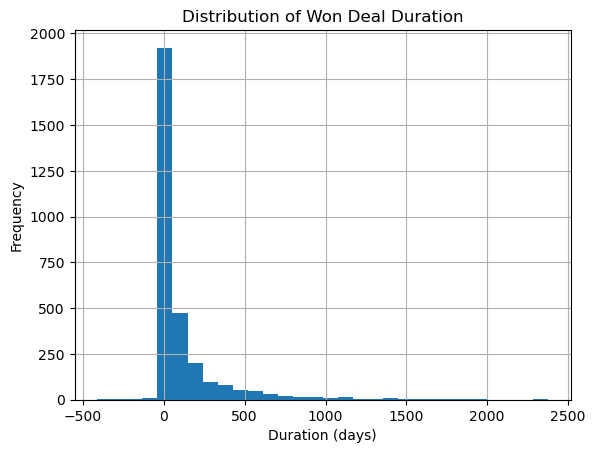

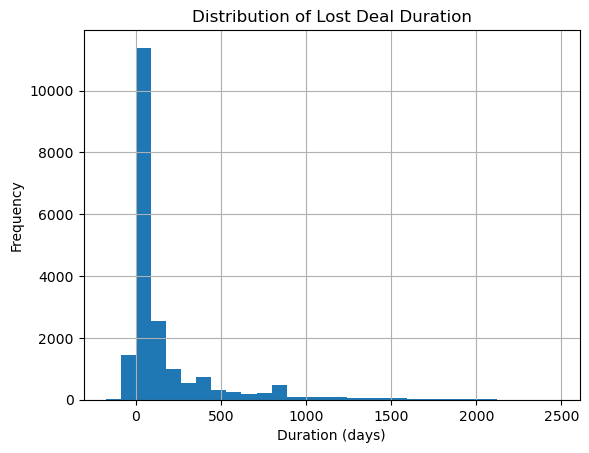

In [28]:
# Distribution Analysis
# Histogram for won deal duration
crm_deal['won_deal_duration'].dropna().hist(bins=30)
plt.title('Distribution of Won Deal Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for lost deal duration
crm_deal['lost_deal_duration'].dropna().hist(bins=30)
plt.title('Distribution of Lost Deal Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

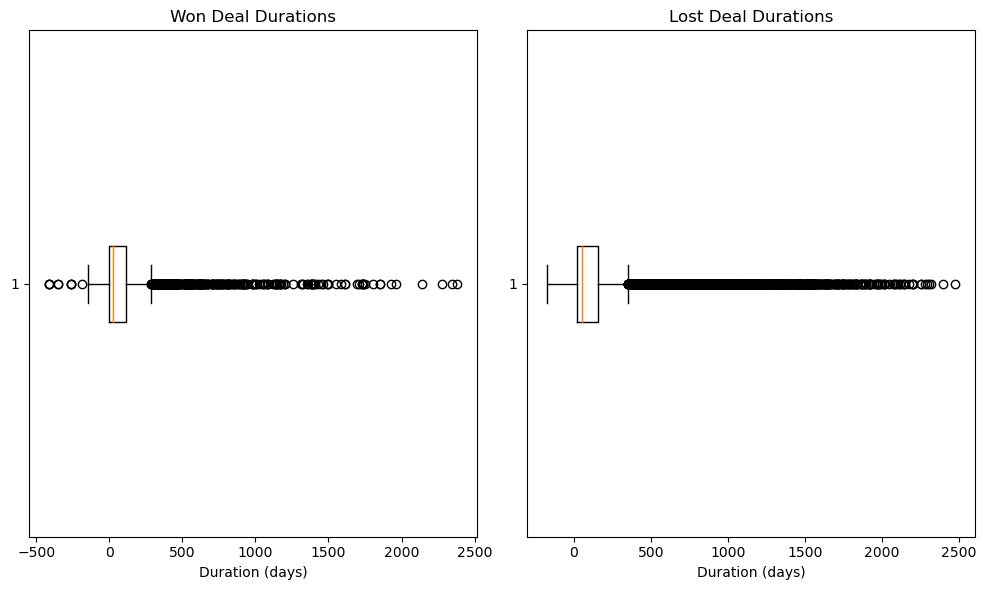

In [31]:
# Comparative Analysis:
# Boxplot comparison of won vs lost deal durations
won_deals = crm_deal.loc[crm_deal['crmStatus'] == 'won', 'won_deal_duration'].dropna()
lost_deals = crm_deal.loc[crm_deal['crmStatus'] == 'lost', 'lost_deal_duration'].dropna()

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.boxplot(won_deals, vert=False)
plt.title('Won Deal Durations')
plt.xlabel('Duration (days)')

plt.subplot(1, 2, 2)
plt.boxplot(lost_deals, vert=False)
plt.title('Lost Deal Durations')
plt.xlabel('Duration (days)')

plt.tight_layout()
plt.show()

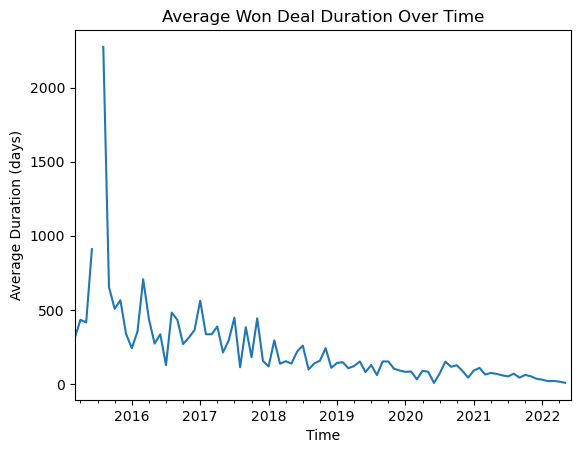

In [30]:
# Trend Analysis
# Resample the data by month and calculate the average duration
crm_deal.set_index('crmAddTime').resample('M')['won_deal_duration'].mean().plot()
plt.title('Average Won Deal Duration Over Time')
plt.xlabel('Time')
plt.ylabel('Average Duration (days)')
plt.show()
